## Primera implementación del método de involuciones para el mapeo no twist cuadrático.

In [1]:
using PyCall
using LaTeXStrings
@pyimport numpy as np
using SymPy
using Roots
using Plots

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:410
└ @ PyCall /home/eve/.julia/packages/PyCall/BcTLp/src/PyCall.jl:410


Defino el mapeo usando cálculo simbólico.

In [2]:
x = Sym("x")
y = Sym("y")
a = Sym("a")
b = Sym("b");
NT(x,y,a,b) = [x+a*(1-(y-b*sin(2*pi*x))^2), y-b*sin(2*pi*x)]

NT (generic function with 1 method)

💠 Primero hacemos el cálculo con dos iteraciones.

In [3]:
NT1 = NT(x,y,a,b) 
NT2 =NT(NT1[1],NT1[2],a,b); # aplico dos veces el mapeo 

Defino la condición de uno de los conjuntos invariantes
$$I_{1}=\{x | x =\frac{a}{2}(1-y^{2})\}$$

Para esto como vamos a calcular ya cosas numéricas necesitamos sustituir el valor de $a,b$.

In [4]:
#condicion en terminos de y
function x_condicion(a)
    x_cond1a = (a/2)*(1-y^2) 
    return x_cond1a
end

x_condicion (generic function with 1 method)

In [5]:
#condicion en terminos de x
function y_condicion(a)
    y_cond1ap = sqrt(a-2*x)
    y_cond1an = sqrt(a-2*x)
    return [y_cond1ap,y_cond1an]
end

y_condicion (generic function with 1 method)

In [6]:
condicion1a = x_condicion(0.1) #condicion con a fija
NT2C = NT2.subs([(x,condicion1a),(a,0.1),(b,0.1)]); #sustituyo  la condicion para x

In [7]:
#si usamos la condicion en terminos de x

# condicion1a = y_condicion(0.1)[1] #condicion para y con a fija y la raiz positiva
# NT2C = NT2.subs([(y,condicion1a),(a,0.1),(b,0.1)]) # sustituyo la condicion


Resolvemos las dos ecuaciones anteriores

In [8]:
#con y como variable
@time cero_1aY = find_zeros(NT2C[1],-4.0,4.0)
@time cero_1bY = find_zeros(NT2C[2],-4.0,4.0)


  9.667194 seconds (3.95 M allocations: 210.182 MiB, 0.89% gc time)
  7.133268 seconds (188.30 k allocations: 4.880 MiB)


1-element Array{Float64,1}:
 0.11096641275318485

In [9]:
cero_1aY

2-element Array{Float64,1}:
 -1.0
  1.0

In [10]:
cero_1bY

1-element Array{Float64,1}:
 0.11096641275318485

In [11]:
#con x como variable
#@time cero_1aX = find_zeros(NT2C[1],0.0,1.0)
#@time cero_1bX = find_zeros(NT2C[2],0.0,1.0)

Ahora podemos calcular los valores de x usando la condición del conjunto invariante.

In [11]:
#definimos una funcion para calcular los puntos x
function x_puntoF(y,a)
    #x = mod((a/2)*(1-y^2),1)
    x = (a/2)*(1-y^2)
    return x
end

#🔴 NOTA -> USAR ESTO ANTES PARA NO DEFINIR LA FUNCION 2 VECES.

x_puntoF (generic function with 1 method)

In [12]:
# para calcular los puntos en y si usamos x como variable al principio
function y_puntoF(x,a)
    y = sqrt(a-2*x)
    return y
end

y_puntoF (generic function with 1 method)

In [13]:
cero_1aX = [x_puntoF(cero_1aY[i],0.1) for i in 1:length(cero_1aY)]
cero_1bX = [x_puntoF(cero_1bY[i],0.1) for i in 1:length(cero_1bY)]


#esto es por si usamos la otra variable
#cero_1aY = y_puntoF(cero_1aX,0.1)
#cero_1bY = y_puntoF(cero_1bX,0.1)

1-element Array{Float64,1}:
 0.04938432276203449

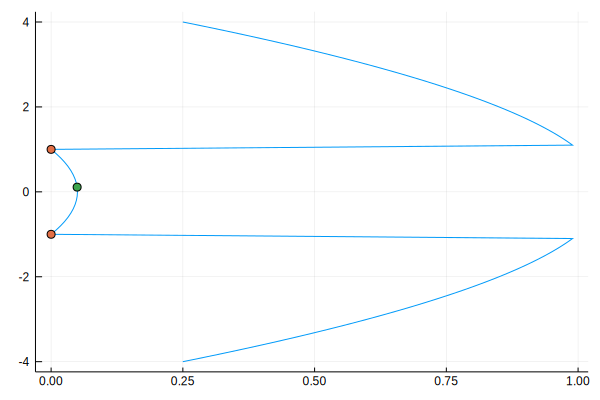

In [14]:
listaY = [y for y in -4.0:0.1:4.0]
listaX = [mod((0.1/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "")
scatter!([cero_1aX,cero_1bX],[cero_1aY,cero_1bY], label = "")

🔷 Si calculamos con el otro conjunto invariante donde 
$$I_{0}= \{(x,y)| x=0\}$$

In [16]:
NT2C0 = NT2.subs([(x,0.0),(a,0.1),(b,0.1)]); #sustituyo 

In [17]:
@time cero_2aY = find_zeros(NT2C0[1],-4.0,4.0)
@time cero_2bY = find_zeros(NT2C0[2],-4.0,4.0)

  7.064263 seconds (222.95 k allocations: 6.586 MiB)
  7.529447 seconds (232.43 k allocations: 6.700 MiB)


1-element Array{Float64,1}:
 0.05860381062844118

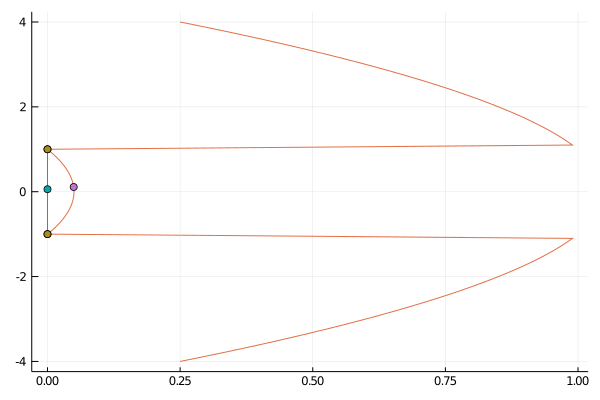

In [18]:
listaY2 = [y for y in -1.0:0.1:1.0]
listaX2 = zeros(21)
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "", title = "")
scatter!([cero_1aX,cero_1bX],[cero_1aY,cero_1bY], label = "")
scatter!([[0,0],[0]],[cero_2aY,cero_2bY], label = "")


### ⭐ Siguiente iteración.

In [19]:
NT3 = NT(NT2[1],NT2[2],a,b);

In [20]:
condicion1a = x_condicion(0.1)
NT3C1 = NT3.subs([(x,condicion1a),(a,0.1),(b,0.1)]); #sustituyo 
# para algnos de los valores de a y b numericos. 

In [21]:
@time cero_3IaY = find_zeros(NT3C1[1],-4.0,4.0)
@time cero_3IbY = find_zeros(NT3C1[2],-4.0,4.0)

# 🔺 NOTA : hacen todo mod algo porque asi no buscan ceros en intervalos muy feos.


 26.151414 seconds (276.96 k allocations: 8.320 MiB)
 24.589351 seconds (249.58 k allocations: 7.188 MiB)


1-element Array{Float64,1}:
 0.20839482002620568

In [22]:
cero_3IaX = [mod(x_puntoF(0.1,cero_3IaY[i]),1) for i in 1:length(cero_3IaY)]
cero_3IbX = [mod(x_puntoF(0.1,cero_3IbY[i]),1) for i in 1:length(cero_3IbY)]

1-element Array{Float64,1}:
 0.10315543591297181

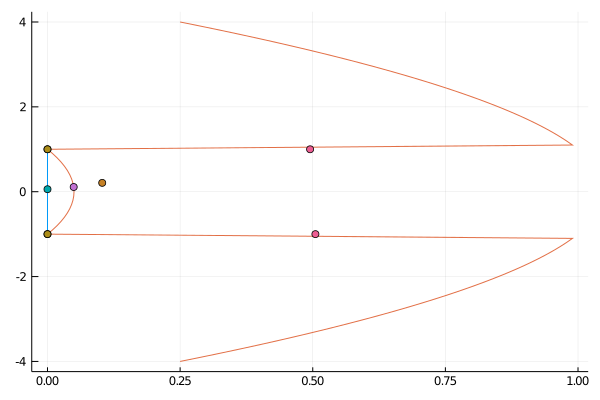

In [23]:
listaY2 = [y for y in -1.0:0.1:1.0]
listaX2 = zeros(21)
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "", title = "")
scatter!([cero_1aX,cero_1bX],[cero_1aY,cero_1bY], label = "")
scatter!([[0,0],[0]],[cero_2aY,cero_2bY], label = "")
scatter!([cero_3IaX,cero_3IbX],[cero_3IaY,cero_3IbY], label = "")

In [24]:
NT3C2 = NT3.subs([(x,0.0),(a,0.1),(b,0.1)]); #sustituyo 

In [25]:
@time cero_3IaYC2 = find_zeros(NT3C2[1],-4.0,4.0)
@time cero_3IbYC2 = find_zeros(NT3C2[2],-4.0,4.0)

 15.468855 seconds (251.88 k allocations: 7.392 MiB)
 14.982835 seconds (226.41 k allocations: 6.539 MiB)


1-element Array{Float64,1}:
 0.1520611988650667

In [26]:
cero_3IaXC2 = zeros(length(cero_3IaYC2))
cero_3IbXC2 = zeros(length(cero_3IbYC2))

1-element Array{Float64,1}:
 0.0

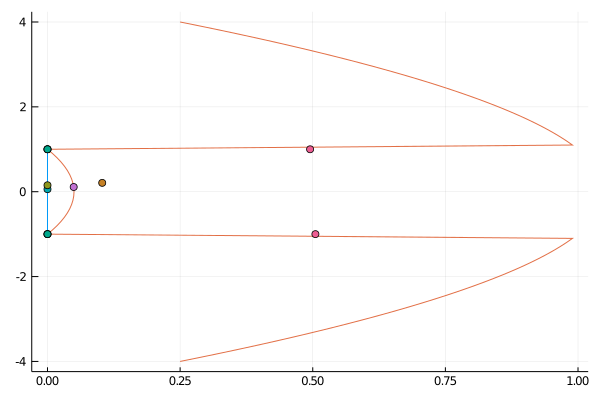

In [27]:
listaY2 = [y for y in -1.0:0.1:1.0]
listaX2 = zeros(21)
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "", title = "")
scatter!([cero_1aX,cero_1bX],[cero_1aY,cero_1bY], label = "")
scatter!([[0,0],[0]],[cero_2aY,cero_2bY], label = "")
scatter!([cero_3IaX,cero_3IbX],[cero_3IaY,cero_3IbY], label = "")
scatter!([cero_3IaXC2,cero_3IbXC2],[cero_3IaYC2, cero_3IbYC2], label="")

### ⭐ Siguiente iteración.

In [28]:
NT4 = NT(NT3[1],NT3[2],a,b);

In [29]:
condicion1a = x_condicion(0.1)
NT4C1 = NT4.subs([(x,condicion1a),(a,0.1),(b,0.1)]);

In [30]:
@time cero_4IaY = find_zeros(NT4C1[1],0.0,1.0)
@time cero_4IbY = find_zeros(NT4C1[2],0.0,1.0)

 32.984761 seconds (171.15 k allocations: 4.917 MiB)
 20.580147 seconds (186.85 k allocations: 5.471 MiB)


1-element Array{Float64,1}:
 0.29072354254508564

In [31]:
cero_4IaX = [mod(x_puntoF(0.1,cero_4IaY[i]),1) for i in 1:length(cero_4IaY)]
cero_4IbX = [mod(x_puntoF(0.1,cero_4IbY[i]),1) for i in 1:length(cero_4IbY)]

1-element Array{Float64,1}:
 0.1439081535598174

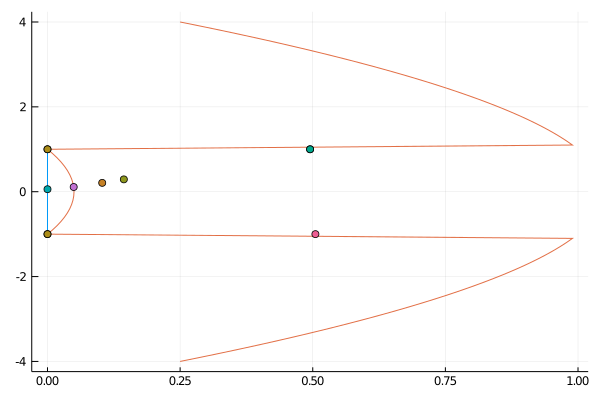

In [32]:
listaY2 = [y for y in -1.0:0.1:1.0]
listaX2 = zeros(21)
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "", title = "")
scatter!([cero_1aX,cero_1bX],[cero_1aY,cero_1bY], label = "")
scatter!([[0,0],[0]],[cero_2aY,cero_2bY], label = "")
scatter!([cero_3IaX,cero_3IbX],[cero_3IaY,cero_3IbY], label = "")
scatter!([cero_4IaX,cero_4IbX],[cero_4IaY,cero_4IbY], label = "")

### ⭐ Siguiente iteración.

In [40]:
NT5 = NT(NT4[1],NT4[2],a,b);

In [34]:
condicion1a = x_condicion(0.1)

             2
0.05 - 0.05⋅y 

In [35]:
NT5C1 = NT5.subs([(x,condicion1a),(a,0.1),(b,0.1)])

In [36]:
@time cero_5IaY = find_zeros(NT5C1[1],0.0,1.0)
@time cero_5IbY = find_zeros(NT5C1[2],0.0,1.0)

 38.854216 seconds (171.14 k allocations: 4.917 MiB)
 34.467528 seconds (207.74 k allocations: 6.053 MiB)


1-element Array{Float64,1}:
 0.3338618280315592

In [37]:
cero_5IaX = [mod(x_puntoF(0.1,cero_5IaY[i]),1) for i in 1:length(cero_5IaY)]
cero_5IbX = [mod(x_puntoF(0.1,cero_5IbY[i]),1) for i in 1:length(cero_5IbY)]

1-element Array{Float64,1}:
 0.1652616048756218

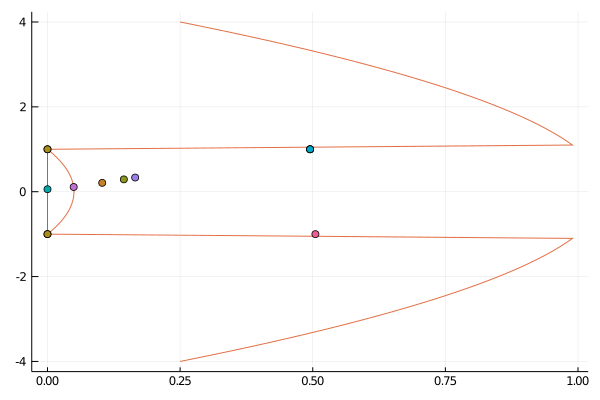

In [38]:
listaY2 = [y for y in -1.0:0.1:1.0]
listaX2 = zeros(21)
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "", title = "")
scatter!([cero_1aX,cero_1bX],[cero_1aY,cero_1bY], label = "")
scatter!([[0,0],[0]],[cero_2aY,cero_2bY], label = "")
scatter!([cero_3IaX,cero_3IbX],[cero_3IaY,cero_3IbY], label = "")
scatter!([cero_4IaX,cero_4IbX],[cero_4IaY,cero_4IbY], label = "")
scatter!([cero_5IaX,cero_5IbX],[cero_5IaY,cero_5IbY], label = "")

Serán realmente los ceros?

In [42]:
NT5C1[1].subs(y, cero_5IaY[1])

-8.32667268468867e-17

In [44]:
NT5C1[2].subs(y, cero_5IbY[1])

-1.38777878078145e-17

y en x?

In [54]:
x_condicion(0.1).subs(y,cero_5IaY[1])

0

In [56]:

x_condicion(0.1).subs(y,cero_5IbY[1])

0.0444268139891713